In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = r"C:\Users\Deshan\Downloads\bank+marketing\bank\bank-full.csv"

df = pd.read_csv(file_path)

In [3]:
df.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


In [4]:
import pandas as pd

file_path = r"C:\Users\Deshan\Downloads\bank+marketing\bank\bank-full.csv"

columns = [
    "age",
    "job",
    "marital",
    "education",
    "default",
    "balance",
    "housing",
    "loan", 
    "contact",
    "day",
    "month",
    "duration",
    "campaign",
    "pdays",
    "previous", 
    "poutcome",
    "y"
]

df = pd.read_csv(file_path, sep=';', header=None, names=columns)

df = df.replace('"', '', regex=True)

df = df[df.columns].loc[~(df == df.columns).all(axis=1)]

output_file_path = r"C:\Users\Deshan\Downloads\bank+marketing\bank\bank structured2.csv"
df.to_csv(output_file_path, index=False)

print(f"Structured dataset saved.")


C:\Users\Deshan\AppData\Local\Temp\ipykernel_17804\3804074540.py:25: DtypeWarning: Columns (0,5,9,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=';', header=None, names=columns)


Structured dataset saved.


In [5]:
df = pd.read_csv(output_file_path)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


For categorical features

In [7]:
for col in df.select_dtypes(include='object').columns: # to understand categorical features
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


In [8]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features

for feature in categorical_features:
    print('For feature, {} , it has {} categories'.format(feature,len(df[feature].unique())))

For feature, job , it has 12 categories
For feature, marital , it has 3 categories
For feature, education , it has 4 categories
For feature, default , it has 2 categories
For feature, housing , it has 2 categories
For feature, loan , it has 2 categories
For feature, contact , it has 3 categories
For feature, month , it has 12 categories
For feature, poutcome , it has 4 categories


relationship between categorical features and target value...

In [9]:
for categorical_feature in categorical_features:
    print(df.groupby(['y',categorical_feature]).size())

y    job          
no   admin.           4540
     blue-collar      9024
     entrepreneur     1364
     housemaid        1131
     management       8157
     retired          1748
     self-employed    1392
     services         3785
     student           669
     technician       6757
     unemployed       1101
     unknown           254
yes  admin.            631
     blue-collar       708
     entrepreneur      123
     housemaid         109
     management       1301
     retired           516
     self-employed     187
     services          369
     student           269
     technician        840
     unemployed        202
     unknown            34
dtype: int64
y    marital 
no   divorced     4585
     married     24459
     single      10878
yes  divorced      622
     married      2755
     single       1912
dtype: int64
y    education
no   primary       6260
     secondary    20752
     tertiary     11305
     unknown       1605
yes  primary        591
     secondary     2

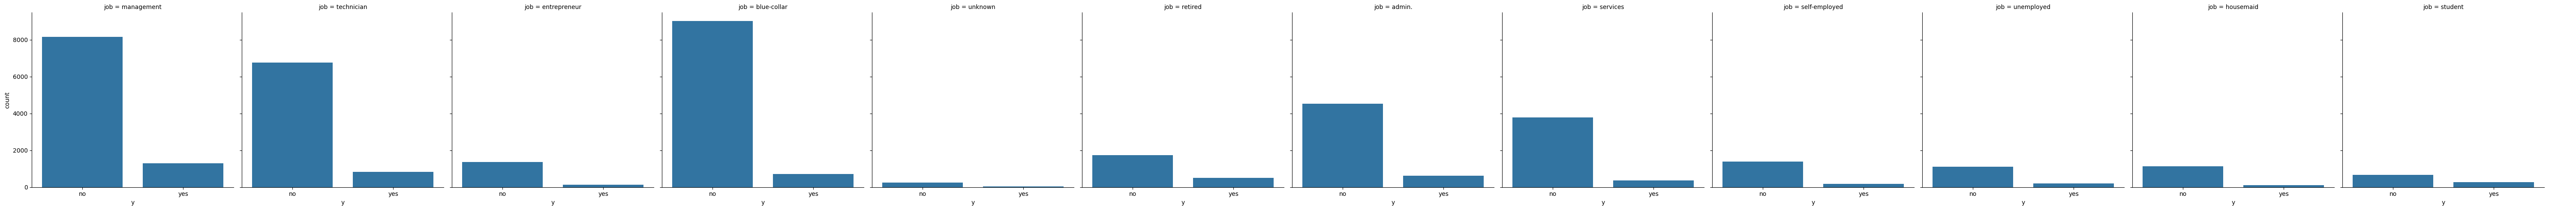

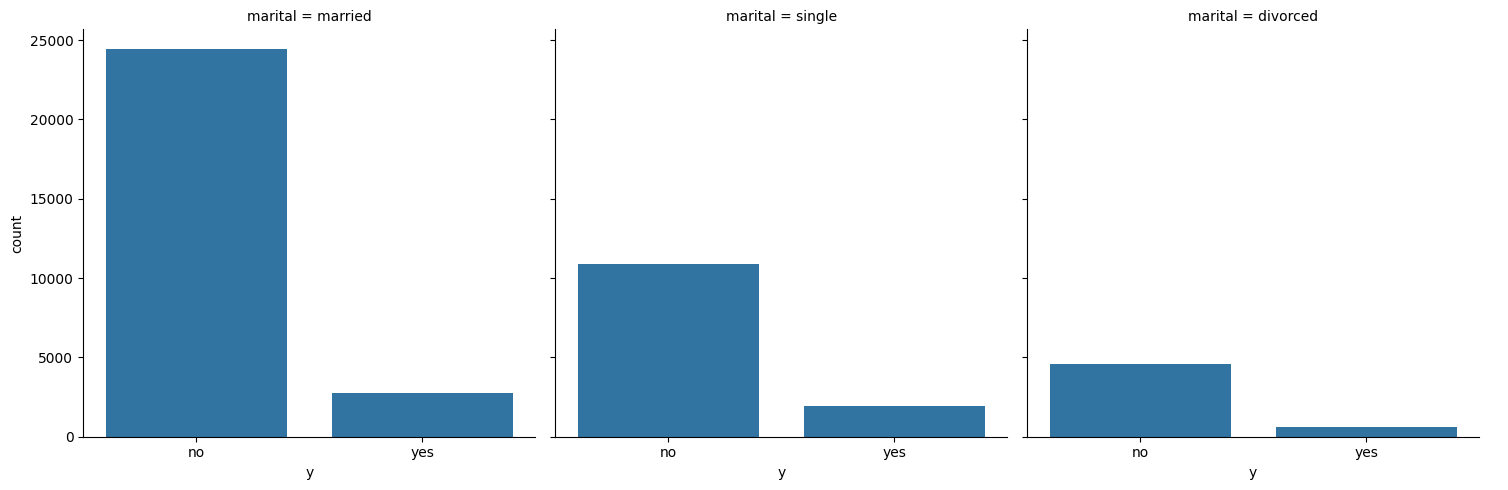

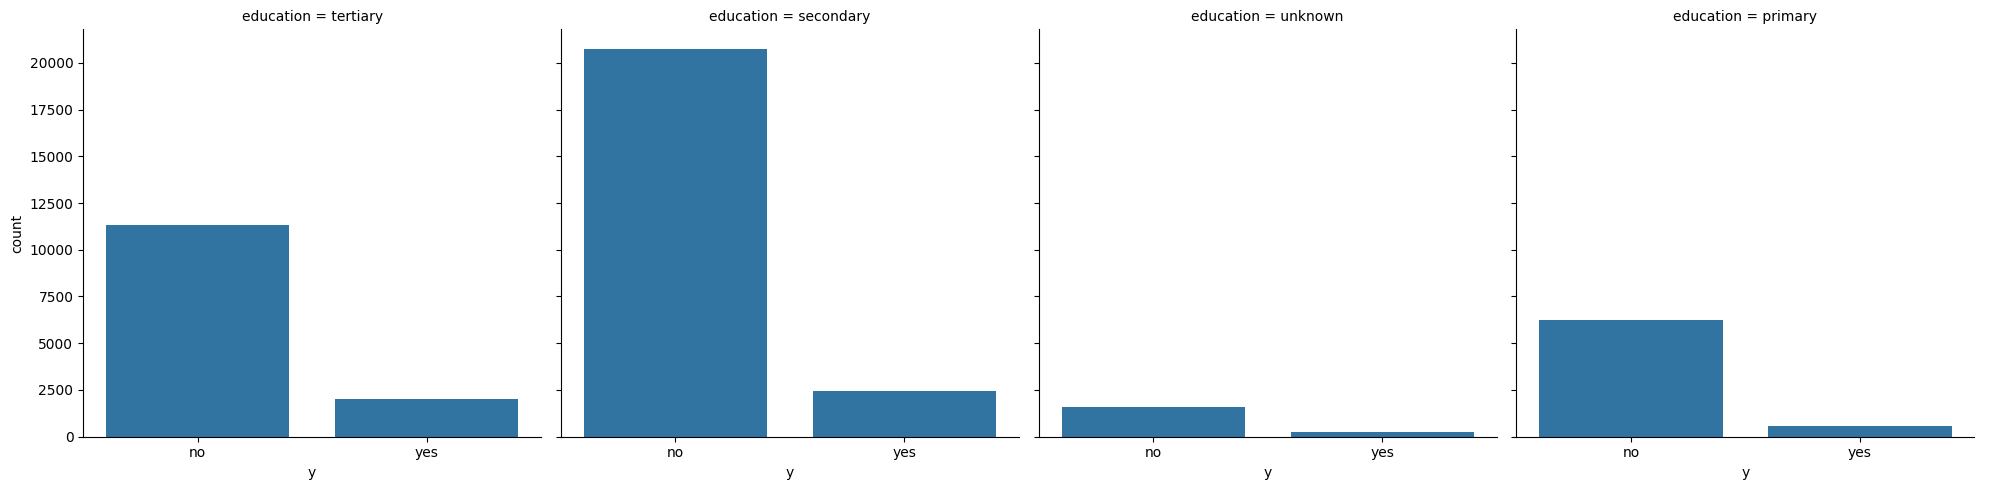

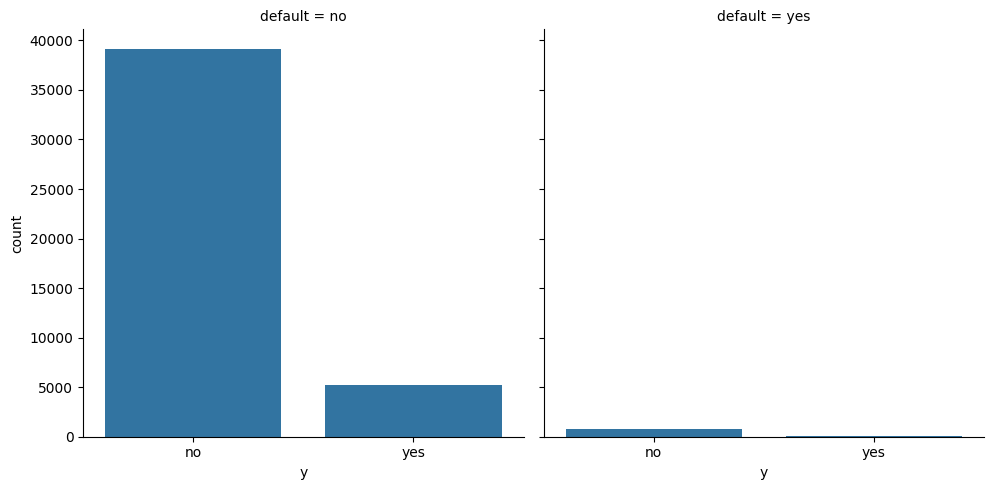

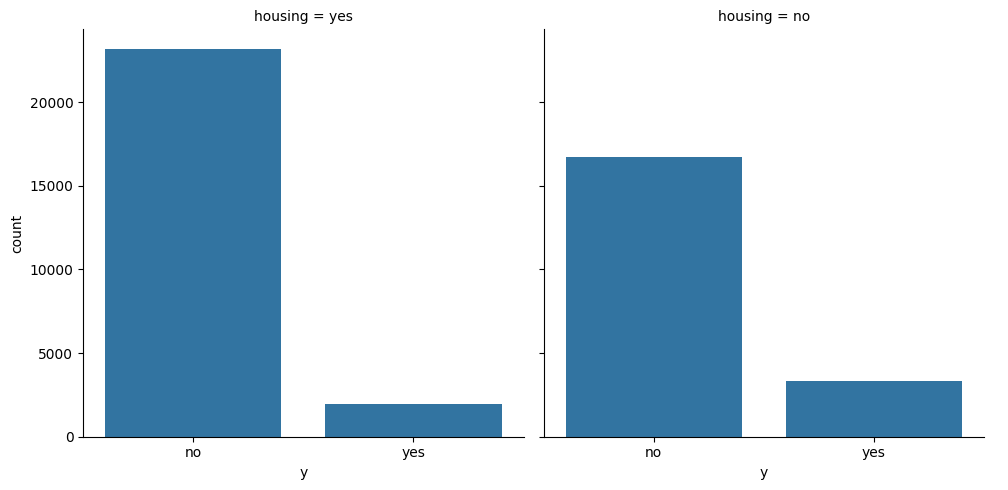

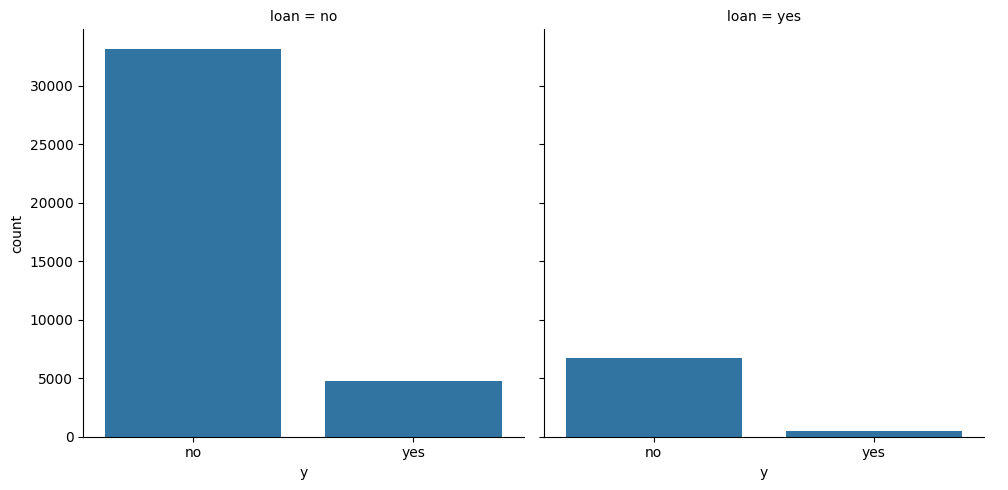

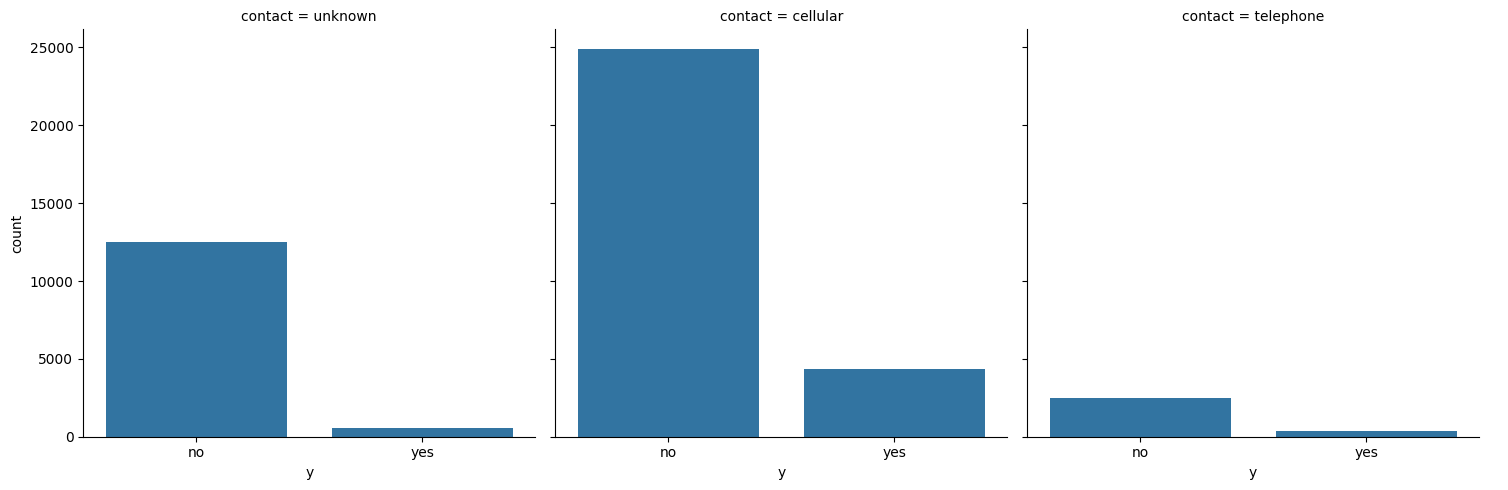

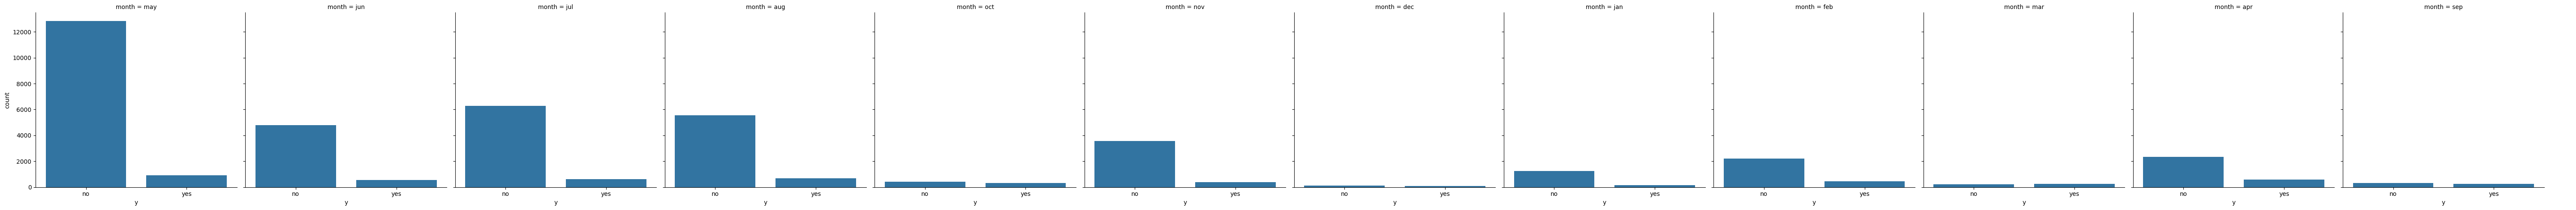

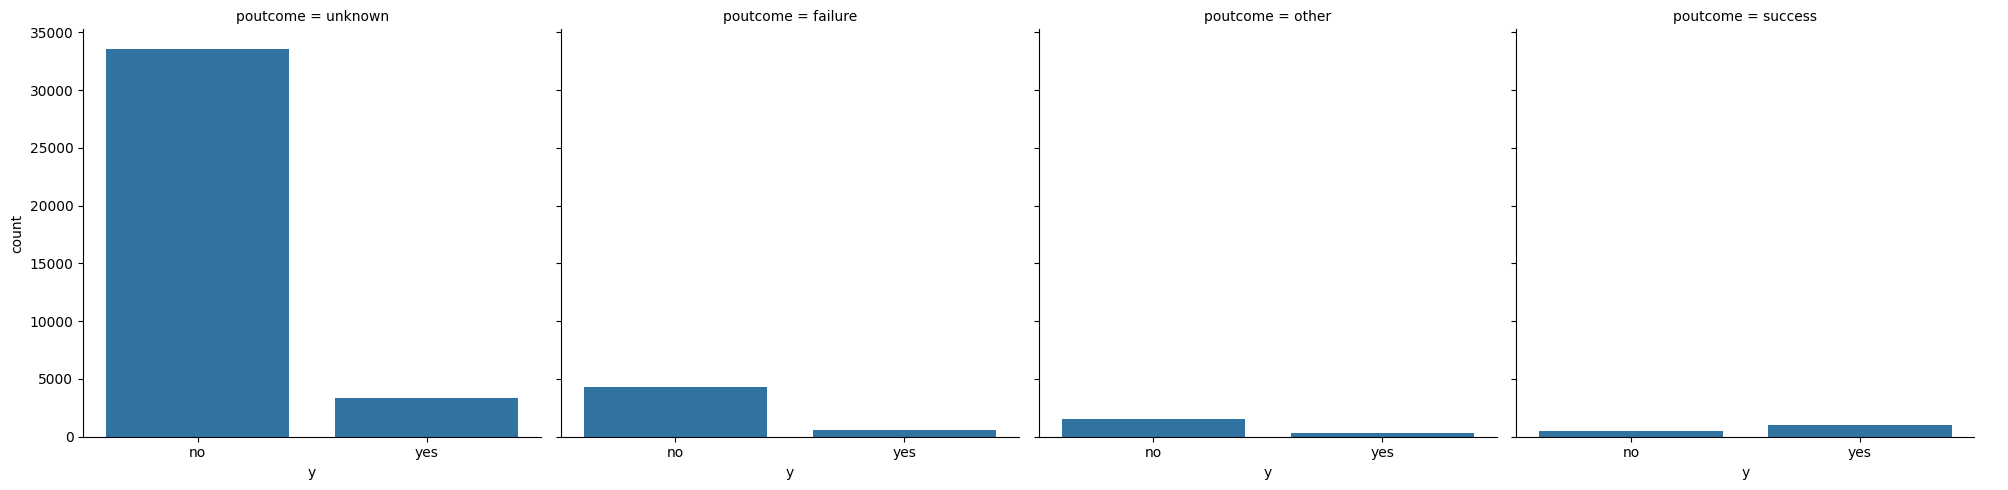

In [10]:
for categorical_feature in categorical_features:
    sns.catplot(x='y', col=categorical_feature, kind='count', data= df)
plt.show()

Describing numerical features

In [11]:
df.describe() 

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
print('There are ', len(numerical_features), 'numerical variables')

# visualising
df[numerical_features].head()

There are  7 numerical variables


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


to find discrete numerical features...

In [13]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) < 25]

print("Discrete Variables count: {}".format(len(discrete_features)))
print(discrete_features)

Discrete Variables count: 0
[]


to find continuos numerical features...

In [14]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features+['y']]
print("Continuous feature count {}".format(len(continuous_features)))
print(continuous_features)

Continuous feature count 7
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In target variable....

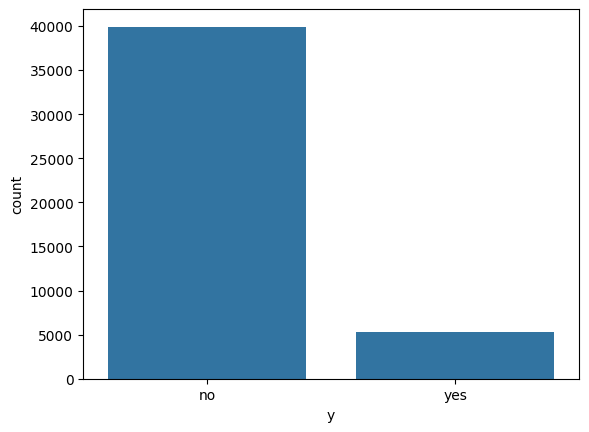

In [15]:
sns.countplot(x='y',data=df)
plt.show()

In [16]:
df['y'].groupby(df['y']).count()

y
no     39922
yes     5289
Name: y, dtype: int64

relationship between continus features and the target variable

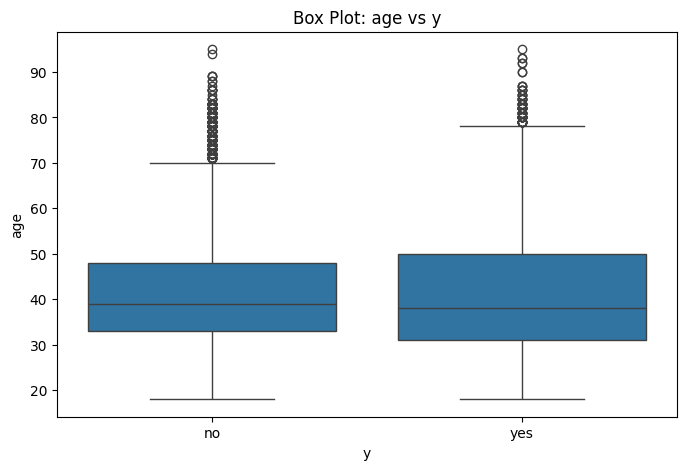

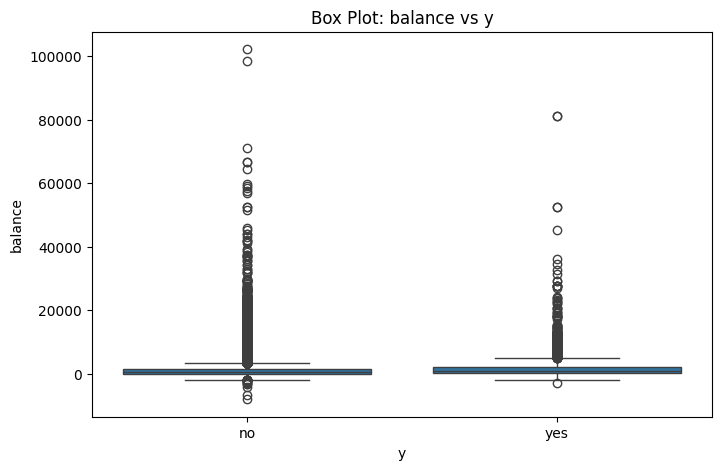

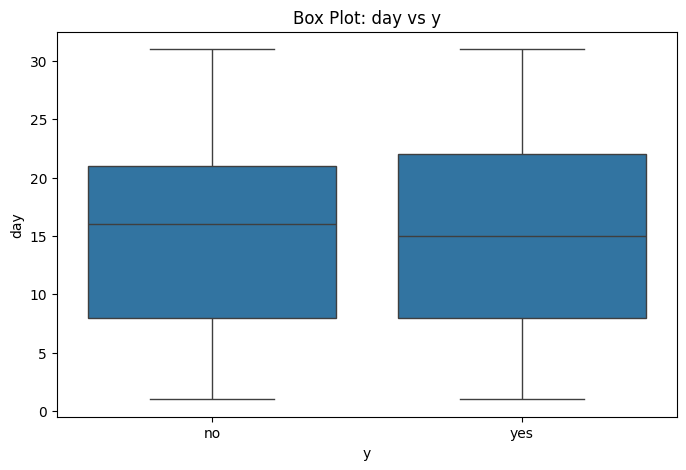

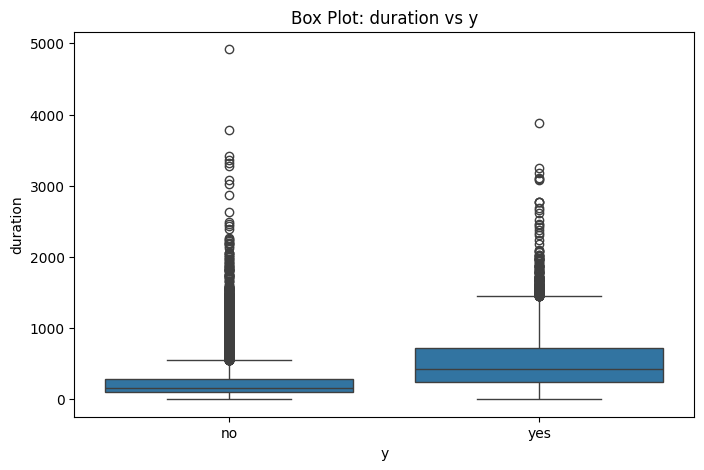

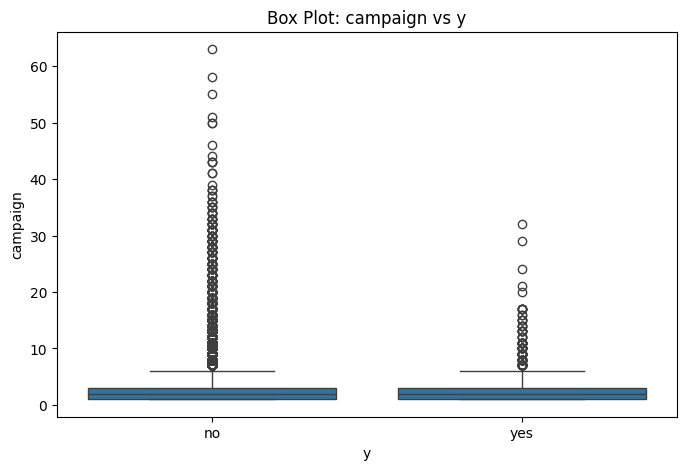

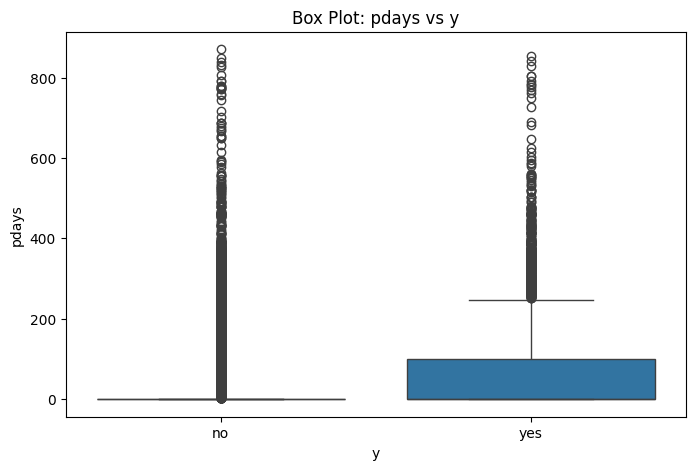

In [17]:
continuous_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays']

#target variable
label = "y"

for feature in continuous_features:
    # box Plot
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=label, y=feature)
    plt.title(f"Box Plot: {feature} vs {label}")
    plt.xlabel(label)
    plt.ylabel(feature)
    plt.show()


correlation between neumerical features

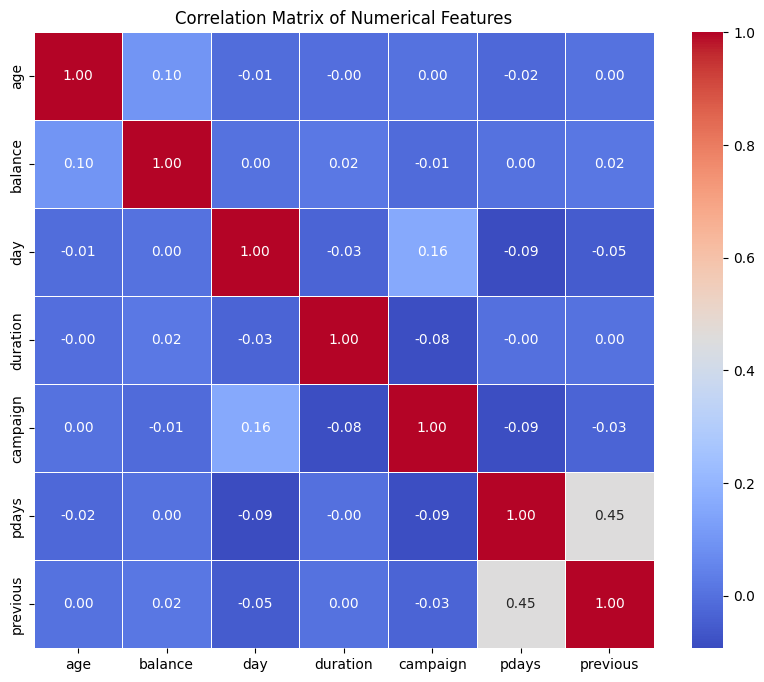

In [18]:
numerical_features = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]

#correlation matrix
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


Feature Engineering

Missing values...

In [19]:
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


Features with one values

In [20]:
for column in df.columns:
    print(column,df[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


To find outliers...

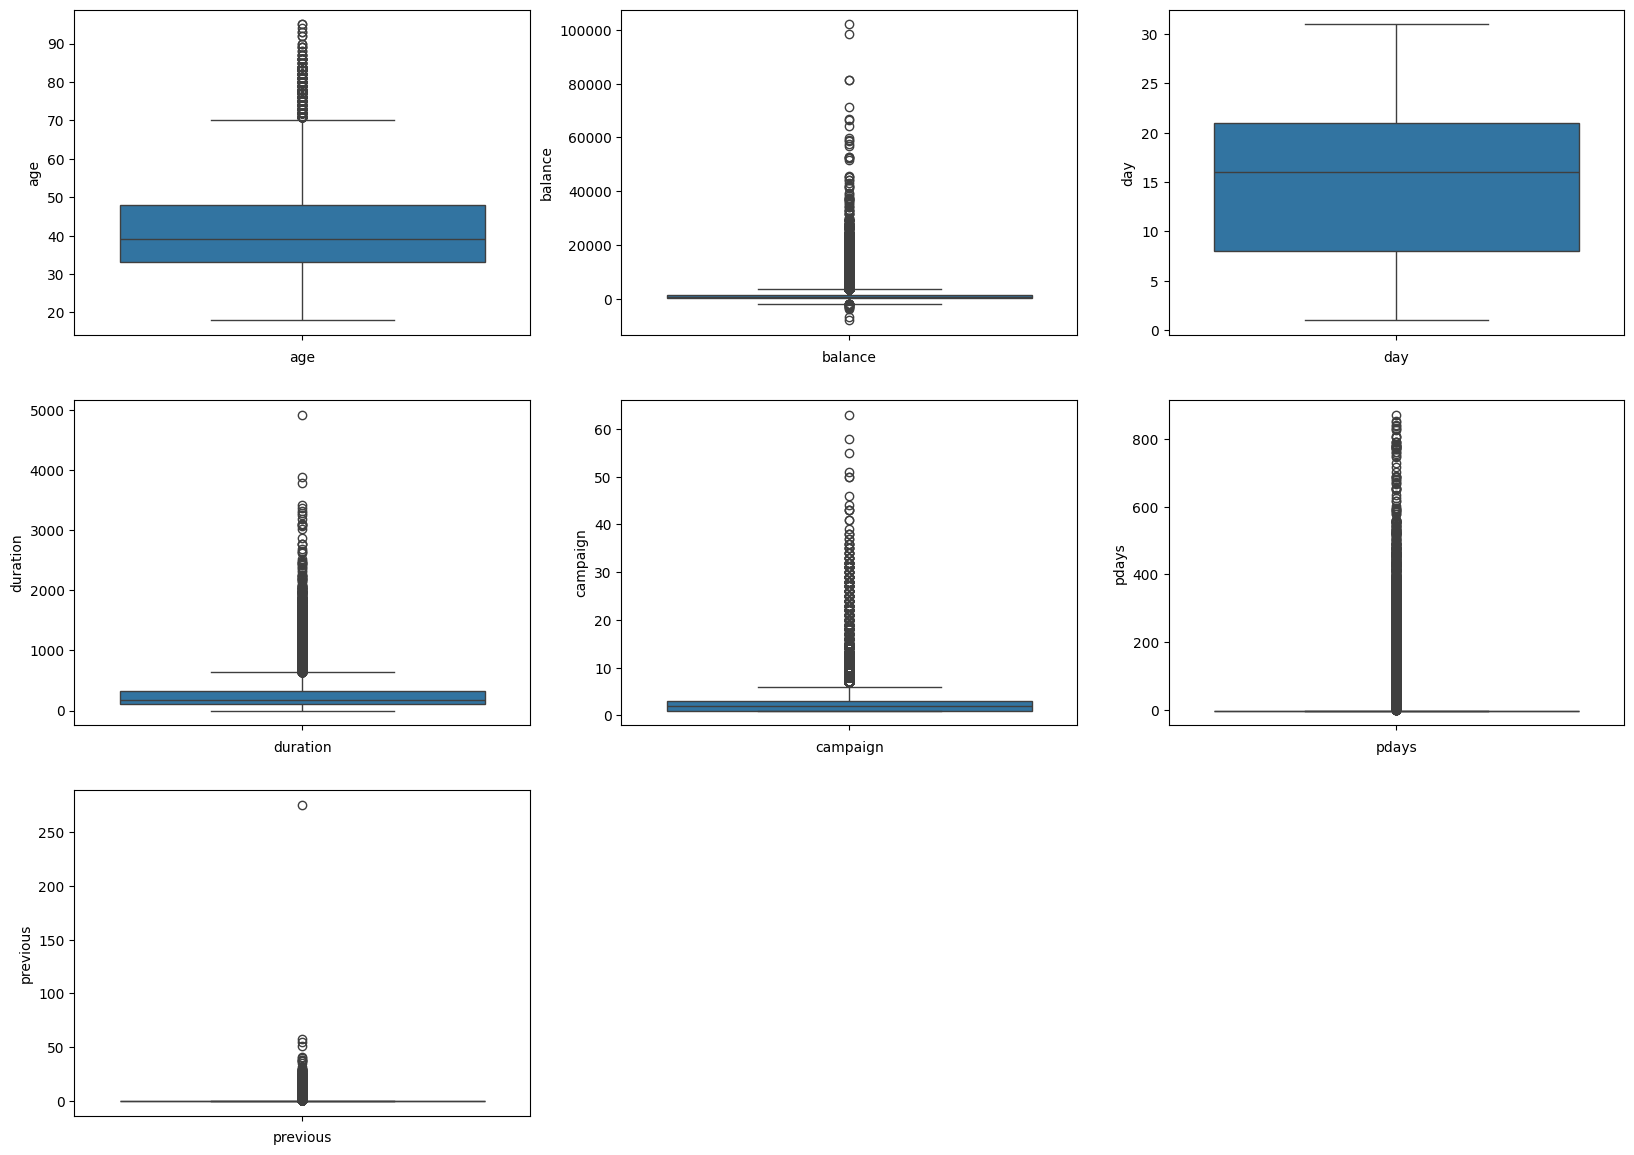

In [21]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

New data frame..

In [22]:
df2=df.copy()
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [23]:
df2.shape

(45211, 17)

Target variable with other features....

Default

In [24]:
df2.groupby(['y','default']).size()

y    default
no   no         39159
     yes          763
yes  no          5237
     yes           52
dtype: int64

In [25]:
df2.drop(['default'],axis=1, inplace=True)

pdays

In [26]:
df2.groupby(['y','pdays']).size()

y    pdays
no   -1       33570
      1           9
      2          35
      3           1
      4           1
              ...  
yes   804         1
      805         1
      828         1
      842         1
      854         1
Length: 914, dtype: int64

In [27]:
df2.drop(['pdays'],axis=1, inplace=True)

age

In [28]:
df2.groupby(['y','age'],sort=True)['age'].count()

y    age
no   18      5
     19     24
     20     35
     21     57
     22     89
            ..
yes  87      3
     90      2
     92      2
     93      2
     95      1
Name: age, Length: 148, dtype: int64

balance

In [29]:
df2.groupby(['y','balance'],sort=True)['balance'].count()

y    balance
no   -8019      1
     -6847      1
     -4057      1
     -3372      1
     -3313      1
               ..
yes   34646     1
      36252     1
      45248     1
      52587     2
      81204     2
Name: balance, Length: 9258, dtype: int64

duration

In [30]:
df2.groupby(['y','duration'],sort=True)['duration'].count()

y    duration
no   0            3
     1            2
     2            3
     3            4
     4           15
                 ..
yes  3094         1
     3102         1
     3183         1
     3253         1
     3881         1
Name: duration, Length: 2627, dtype: int64

campaign

In [31]:
df2.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           14983
     2           11104
     3            4903
     4            3205
     5            1625
                 ...  
yes  20              1
     21              1
     24              1
     29              1
     32              1
Name: campaign, Length: 70, dtype: int64

previous

In [32]:
df2.groupby(['y','previous'],sort=True)['previous'].count()

y    previous
no   0           33570
     1            2189
     2            1650
     3             848
     4             543
                 ...  
yes  26              1
     29              1
     30              1
     55              1
     58              1
Name: previous, Length: 66, dtype: int64

In [33]:
df2.drop(['previous'],axis=1, inplace=True)

poutcome

In [34]:
df2.groupby(['y','poutcome'],sort=True)['poutcome'].count() 


y    poutcome
no   failure      4283
     other        1533
     success       533
     unknown     33573
yes  failure       618
     other         307
     success       978
     unknown      3386
Name: poutcome, dtype: int64

day

In [35]:
df2.groupby(['y','day'],sort=True)['day'].count() 

y    day
no   1       232
     2      1111
     3       901
     4      1215
     5      1695
            ... 
yes  27      150
     28      143
     29      129
     30      271
     31       46
Name: day, Length: 62, dtype: int64

month

In [36]:
df2.groupby(['y','month'],sort=True)['month'].count() 

y    month
no   apr       2355
     aug       5559
     dec        114
     feb       2208
     jan       1261
     jul       6268
     jun       4795
     mar        229
     may      12841
     nov       3567
     oct        415
     sep        310
yes  apr        577
     aug        688
     dec        100
     feb        441
     jan        142
     jul        627
     jun        546
     mar        248
     may        925
     nov        403
     oct        323
     sep        269
Name: month, dtype: int64

capping outliers...

In [37]:
numerical_features = ['age', 'balance', 'duration', 'campaign']

# Capping outliers
for feature in numerical_features:
    lower_percentile = df2[feature].quantile(0.05)  # 5th percentile
    upper_percentile = df2[feature].quantile(0.95)  # 95th percentile
    
    df2[feature] = df2[feature].clip(lower=lower_percentile, upper=upper_percentile)
    print(f"{feature}: Capped between {lower_percentile} and {upper_percentile}")

print(df2[numerical_features].describe())


age: Capped between 27.0 and 59.0
balance: Capped between -172.0 and 5768.0
duration: Capped between 35.0 and 751.0
campaign: Capped between 1.0 and 8.0
                age       balance      duration      campaign
count  45211.000000  45211.000000  45211.000000  45211.000000
mean      40.764084   1116.990843    242.220787      2.511513
std        9.698341   1581.303636    191.849581      1.905038
min       27.000000   -172.000000     35.000000      1.000000
25%       33.000000     72.000000    103.000000      1.000000
50%       39.000000    448.000000    180.000000      2.000000
75%       48.000000   1428.000000    319.000000      3.000000
max       59.000000   5768.000000    751.000000      8.000000


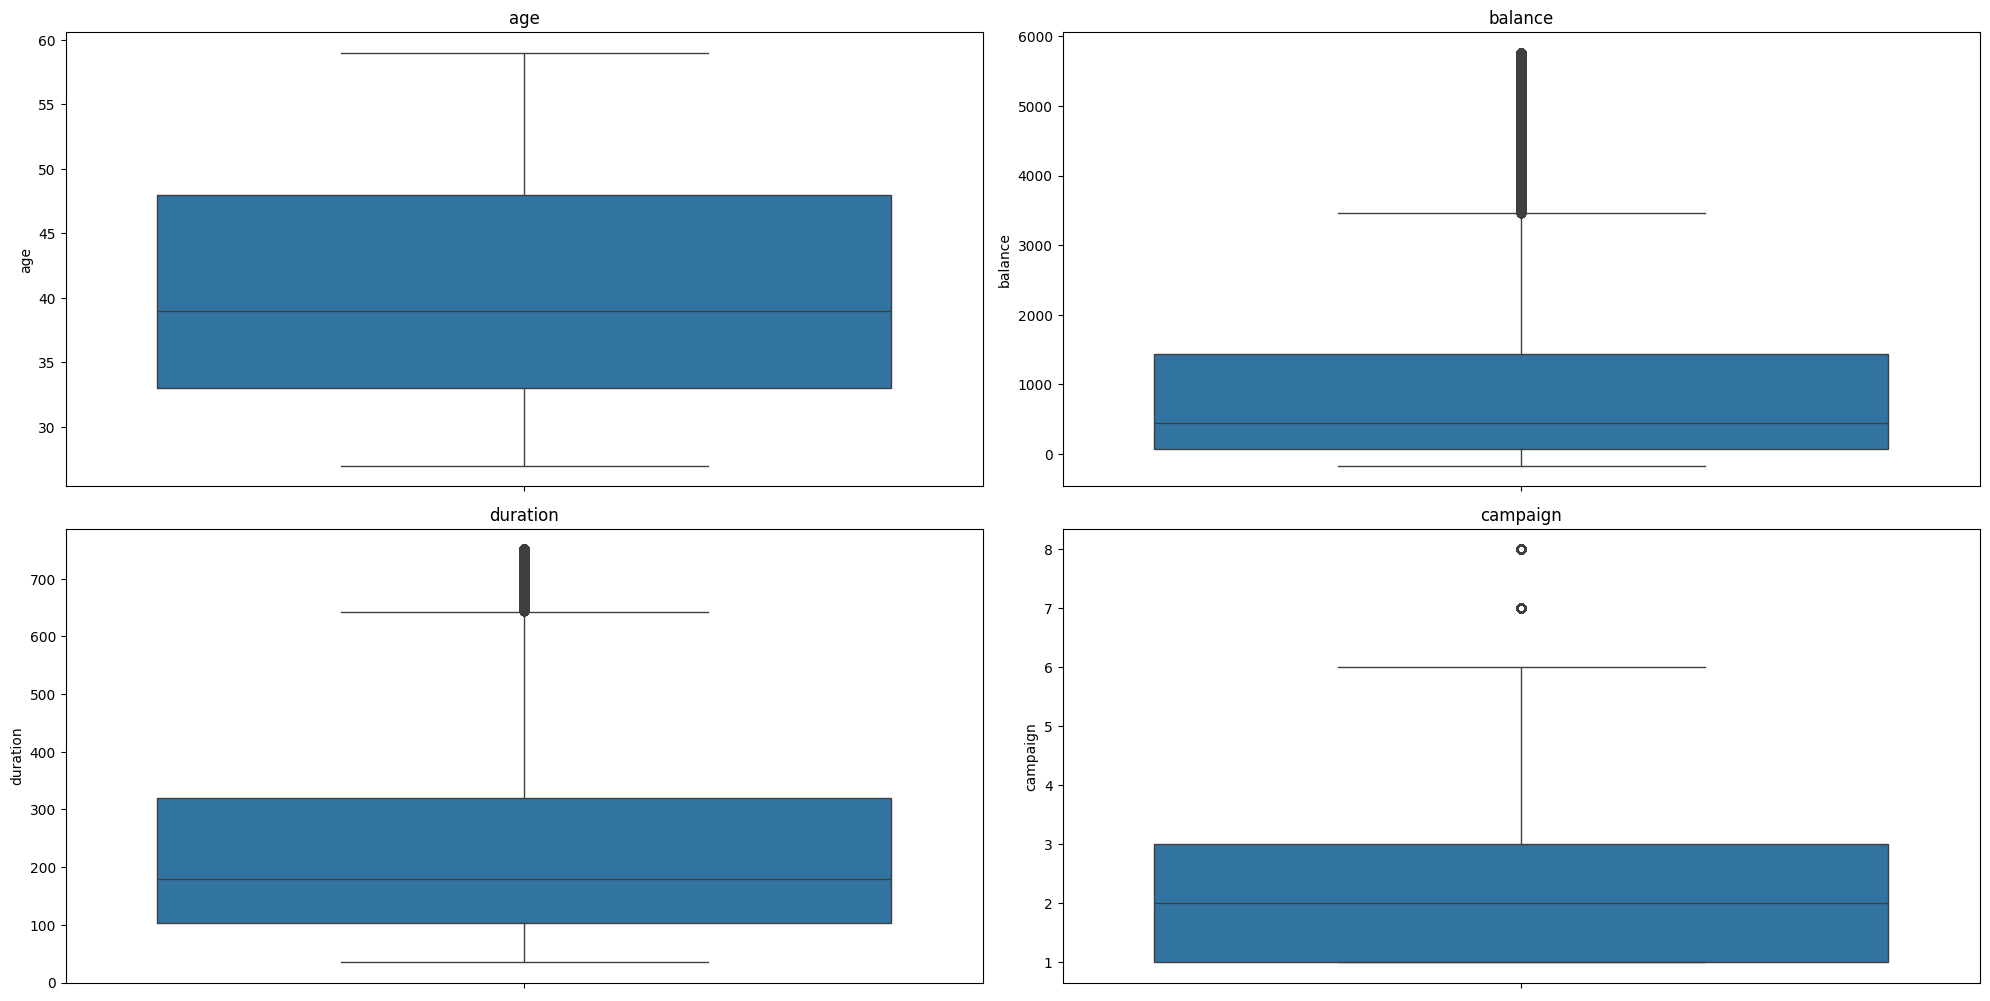

In [38]:
# boxplots
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
plotnumber = 1
for feature in numerical_features :
    plt.subplot(3, 2, plotnumber)
    sns.boxplot(df2[feature])
    plt.title(feature)
    plotnumber += 1

plt.tight_layout()
plt.show()


new dataframe

In [39]:
df3 = df2.copy()

print(df3.columns)

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'poutcome', 'y'],
      dtype='object')


one hot encoding categorical features and converting boolean columns into numerical format...

In [40]:
# one-hot encoding for categorical columns
cat_columns = ['job', 'marital', 'education', 'contact', 'poutcome', 'month']
dummies_df = pd.get_dummies(df3[cat_columns], prefix=cat_columns, drop_first=True)

df3 = pd.concat([df3.drop(cat_columns, axis=1), dummies_df], axis=1)

# boolean columns into numerical format
bool_columns = ['housing', 'loan', 'y']
for col in bool_columns:
    df3[col + '_new'] = df3[col].apply(lambda x: 1 if x == 'yes' else 0)

df3 = df3.drop(bool_columns, axis=1)

# updated dataframe
print(df3.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   job_blue-collar      45211 non-null  bool 
 6   job_entrepreneur     45211 non-null  bool 
 7   job_housemaid        45211 non-null  bool 
 8   job_management       45211 non-null  bool 
 9   job_retired          45211 non-null  bool 
 10  job_self-employed    45211 non-null  bool 
 11  job_services         45211 non-null  bool 
 12  job_student          45211 non-null  bool 
 13  job_technician       45211 non-null  bool 
 14  job_unemployed       45211 non-null  bool 
 15  job_unknown          45211 non-null  bool 
 16  marital_married      4

feature scaling for standarizalation

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'day']
df3[numerical_columns] = scaler.fit_transform(df3[numerical_columns])


correlation analysis between features

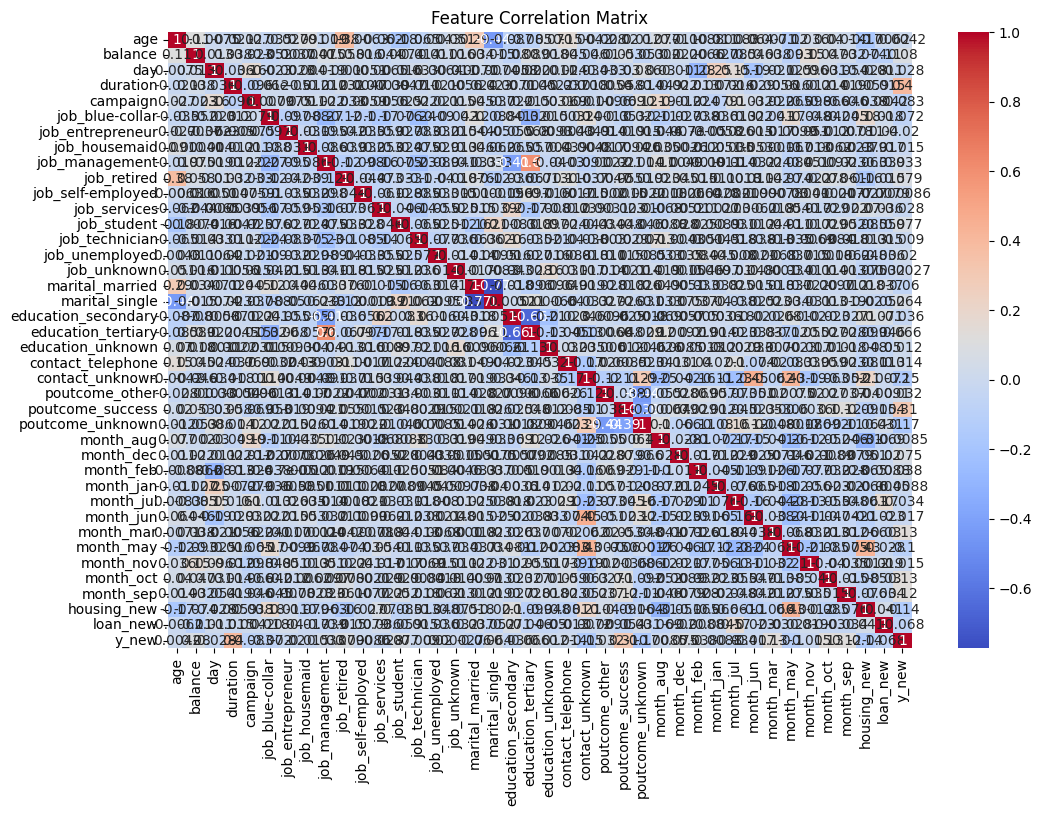

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


spliting dataset

In [43]:
from sklearn.model_selection import train_test_split

X = df3.drop('y_new', axis=1)  # features

y = df3['y_new']  # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
len(X_train)

36168

In [45]:
len(X_test)

9043

model selection and set up

After SMOTE: y_new
0    31970
1    31970
Name: count, dtype: int64
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


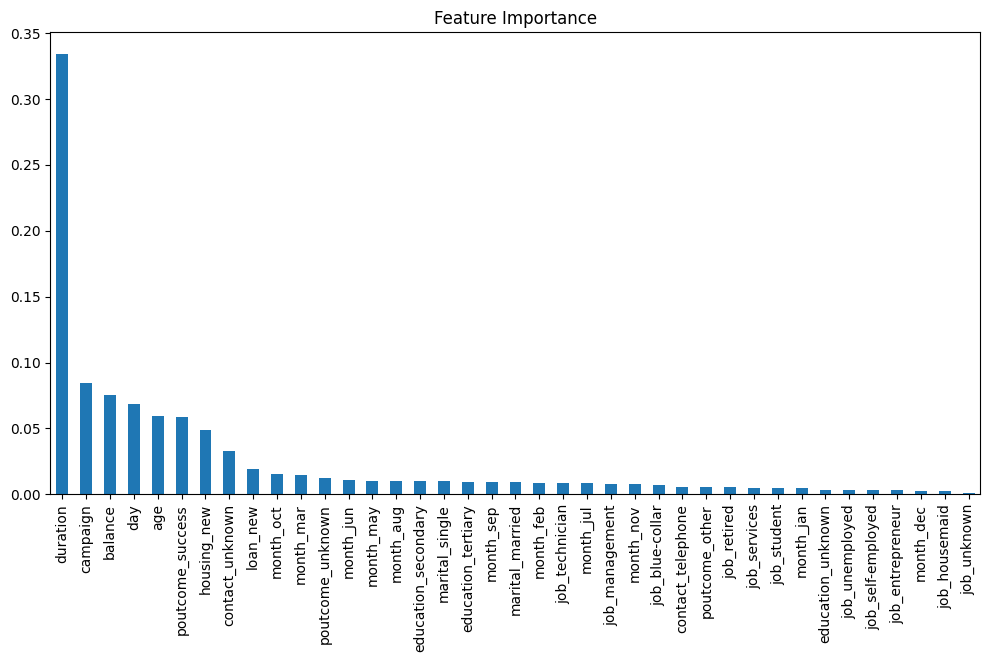

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# class distribution after SMOTE
print("After SMOTE:", y_train_balanced.value_counts())

# initializing
rf_model = RandomForestClassifier(random_state=42)

# hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    
    'max_depth': [None, 10, 20, 30],
    
    'min_samples_split': [2, 5, 10],
    
    'min_samples_leaf': [1, 2, 4],
    
    'bootstrap': [True, False]
}

# gridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

# best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# updaitng random forest with the best parameters
rf_model = grid_search.best_estimator_

# feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))

plt.title("Feature Importance")
plt.show()


model training

In [47]:
# training after adding smote
rf_model.fit(X_train_balanced, y_train_balanced)
print("Random Forest Classifier trained successfully on SMOTE-balanced data.")

# training accuracy
train_accuracy = rf_model.score(X_train_balanced, y_train_balanced)
print(f"Training Accuracy on Balanced Data: {train_accuracy:.2f}")

# test accuracy
test_accuracy = rf_model.score(X_test, y_test)
print(f"Test Accuracy on Test Data: {test_accuracy:.2f}")


Random Forest Classifier trained successfully on SMOTE-balanced data.
Training Accuracy on Balanced Data: 1.00
Test Accuracy on Test Data: 0.89


results

Adjusted Threshold: 0.3
Accuracy: 0.86
Precision: 0.46
Recall: 0.81
F1-Score: 0.59
AUC-ROC: 0.92
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      7952
           1       0.46      0.81      0.59      1091

    accuracy                           0.86      9043
   macro avg       0.72      0.84      0.75      9043
weighted avg       0.91      0.86      0.88      9043



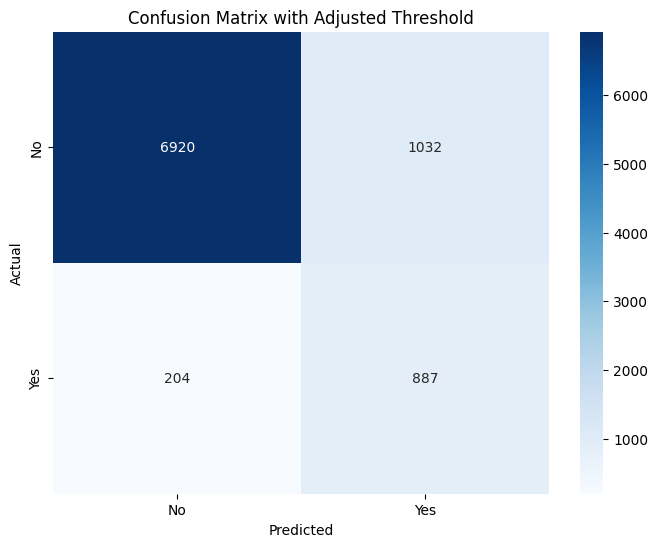

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# to predict probabilities on the test set
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# new threshold
threshold = 0.3  # to improve recall

y_pred_threshold = (y_pred_proba >= threshold).astype(int)

# metrics with the adjusted threshold
accuracy = accuracy_score(y_test, y_pred_threshold)

precision = precision_score(y_test, y_pred_threshold)

recall = recall_score(y_test, y_pred_threshold)

f1 = f1_score(y_test, y_pred_threshold)

auc_roc = roc_auc_score(y_test, y_pred_proba)

print(f"Adjusted Threshold: {threshold}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")

# classification 
print(classification_report(y_test, y_pred_threshold))

# confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_threshold)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix with Adjusted Threshold")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()